In [76]:
import sys
import tensorflow as tf

In [87]:
keras = tf.keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np

# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

y[0]:  0
y[1]:  1
[-1.27111213  0.25410815]
[1 0]
y[0]:  [1 0]
y[1]:  [0 1]


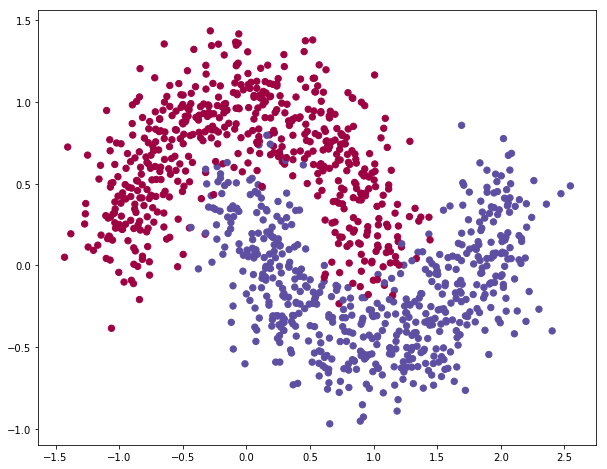

In [78]:
# Generate a dataset and plot it
np.random.seed(1)
X, y = sklearn.datasets.make_moons(1100, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
print("y[0]: ", y[0])
print("y[1]: ", y[1])
p=y.copy()
def maparoni(n):
#     print("Input n: ",n)
    if n == 1: 
        n=[0,1]
    else:
        n=[1,0] 

#     print("Output n: ", n)
    return n
# vfunc = np.vectorize(maparoni)
print(X[0])
y = np.array([maparoni(xi) for xi in y])

# y = vfunc(y)
print(y[0])
print("y[0]: ", y[0])
print("y[1]: ", y[1])

In [79]:
# Generate dummy data
# x_train = np.random.random((1000, 20))
# y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
# x_test = np.random.random((100, 20))
# y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_train = X[:1000]
y_train = y[:1000]
x_test = X[1000:]
y_test = y[1000:]

In [80]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=p, cmap=plt.cm.Spectral)



Epoch 1/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6887 - acc: 0.5720
Epoch 2/20
1000/1000 [==============================] - 0s 30us/step - loss: 0.6876 - acc: 0.5730
Epoch 3/20
1000/1000 [==============================] - 0s 19us/step - loss: 0.6761 - acc: 0.6040
Epoch 4/20
1000/1000 [==============================] - 0s 19us/step - loss: 0.6676 - acc: 0.6130
Epoch 5/20
1000/1000 [==============================] - 0s 21us/step - loss: 0.6530 - acc: 0.6390
Epoch 6/20
1000/1000 [==============================] - 0s 19us/step - loss: 0.6286 - acc: 0.6630
Epoch 7/20
1000/1000 [==============================] - 0s 20us/step - loss: 0.5947 - acc: 0.6810
Epoch 8/20
1000/1000 [==============================] - 0s 20us/step - loss: 0.5878 - acc: 0.6770
Epoch 9/20
1000/1000 [==============================] - 0s 21us/step - loss: 0.5886 - acc: 0.6760
Epoch 10/20
1000/1000 [==============================] - 0s 20us/step - loss: 0.5613 - acc: 0.7030
Epoch 11/20
1000/100

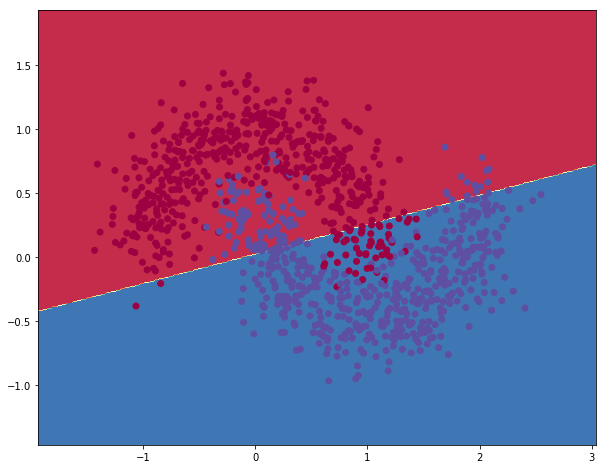

In [81]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(1, activation='relu', input_dim=2))
model.add(Dropout(0.5))
model.add(Dense(63, activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)
# Predict and plot
plot_decision_boundary(lambda x: model.predict_classes(x, batch_size=200))

plt.show()

Epoch 1/20
1000/1000 [==============================] - 1s 941us/step - loss: 0.7397 - acc: 0.4550
Epoch 2/20
1000/1000 [==============================] - 0s 19us/step - loss: 0.6434 - acc: 0.5640
Epoch 3/20
1000/1000 [==============================] - 0s 18us/step - loss: 0.5982 - acc: 0.6620
Epoch 4/20
1000/1000 [==============================] - 0s 17us/step - loss: 0.5884 - acc: 0.6570
Epoch 5/20
1000/1000 [==============================] - 0s 17us/step - loss: 0.5739 - acc: 0.6730
Epoch 6/20
1000/1000 [==============================] - 0s 18us/step - loss: 0.5669 - acc: 0.6670
Epoch 7/20
1000/1000 [==============================] - 0s 18us/step - loss: 0.5879 - acc: 0.6410
Epoch 8/20
1000/1000 [==============================] - 0s 21us/step - loss: 0.5507 - acc: 0.6890
Epoch 9/20
1000/1000 [==============================] - 0s 23us/step - loss: 0.5492 - acc: 0.6750
Epoch 10/20
1000/1000 [==============================] - 0s 20us/step - loss: 0.5526 - acc: 0.6780
Epoch 11/20
1000/1

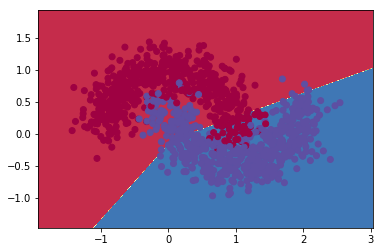

In [61]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(2, activation='relu', input_dim=2))
model.add(Dropout(0.5))
model.add(Dense(62, activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

# Predict and plot
plot_decision_boundary(lambda x: model.predict_classes(x, batch_size=10))

plt.show()

Epoch 1/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.6830 - acc: 0.4740
Epoch 2/20
1000/1000 [==============================] - 0s 61us/step - loss: 0.5755 - acc: 0.8320
Epoch 3/20
1000/1000 [==============================] - 0s 60us/step - loss: 0.4506 - acc: 0.8300
Epoch 4/20
1000/1000 [==============================] - 0s 63us/step - loss: 0.4119 - acc: 0.8500
Epoch 5/20
1000/1000 [==============================] - 0s 60us/step - loss: 0.6744 - acc: 0.7340
Epoch 6/20
1000/1000 [==============================] - 0s 58us/step - loss: 0.5121 - acc: 0.8000
Epoch 7/20
1000/1000 [==============================] - 0s 63us/step - loss: 0.4820 - acc: 0.8060
Epoch 8/20
1000/1000 [==============================] - 0s 56us/step - loss: 0.4889 - acc: 0.8070
Epoch 9/20
1000/1000 [==============================] - 0s 54us/step - loss: 0.4737 - acc: 0.8150
Epoch 10/20
1000/1000 [==============================] - 0s 53us/step - loss: 0.4606 - acc: 0.8230
Epoch 11/20
1000/100

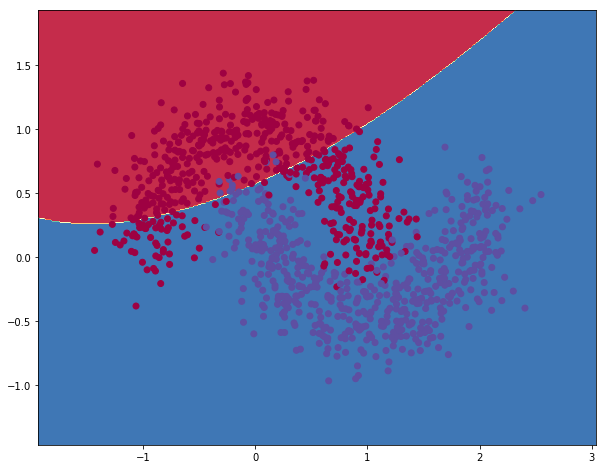

In [95]:
model = Sequential()

model.add(Dense(2, activation='tanh', input_dim=2))
# model.add(Dropout(0.1))
for i in range(0,64):
    model.add(Dense(64, activation='tanh'))
# model.add(Dropout(0.1))
# model.add(Dense(1, activation='tanh'))
model.add(Dense(2, activation='softmax'))


sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=512)
score = model.evaluate(x_test, y_test, batch_size=128)
# Predict and plot
plot_decision_boundary(lambda x: model.predict_classes(x, batch_size=100))

plt.show()

In [97]:
from sklearn import svm
clf = svm.SVC()

In [100]:
clf.fit(X[:1000], p[:1000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [102]:
clf.score(X[1000:], p[1000:])

0.96